## Tips Dataset Overview

The `tips` dataset is a sample dataset provided by the Seaborn library. It contains information about restaurant tips and includes the following columns:

- **`total_bill`**: The total amount of the bill (in dollars).
- **`tip`**: The amount of tip given (in dollars).
- **`sex`**: Gender of the person paying the bill (Male or Female).
- **`smoker`**: Whether the person is a smoker or not (Yes or No).
- **`day`**: Day of the week when the bill was paid (Thursday, Friday, Saturday, or Sunday).
- **`time`**: Time of the day when the bill was paid (Lunch or Dinner).

### Summary Statistics

- **Number of Observations**: 244
- **Number of Features**: 6
- **Feature Types**:
  - Numeric: `total_bill`, `tip`
  - Categorical: `sex`, `smoker`, `day`, `time`

### Example Records

| total_bill | tip | sex   | smoker | day      | time  |
|------------|-----|-------|--------|----------|-------|
| 16.99      | 1.01| Female| No     | Sunday   | Dinner|
| 10.34      | 1.66| Male  | No     | Sunday   | Dinner|
| 21.01      | 3.50| Male  | No     | Sunday   | Dinner|
| 23.68      | 3.31| Male  | No     | Saturday | Dinner|

This dataset is commonly used for exploratory data analysis and visualization. It helps in understanding how different factors like day, time, sex, and smoking status influence the tip amount.


In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
import warnings 
warnings.filterwarnings("ignore")

In [2]:
data=sns.load_dataset("tips")
data.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [3]:
data.shape

(244, 7)

In [4]:
data.groupby("sex")["tip"].value_counts()

sex     tip  
Male    2.00     22
        3.00     16
        4.00      9
        5.00      6
        1.50      5
                 ..
Female  6.70      0
        6.73      0
        7.58      0
        9.00      0
        10.00     0
Name: count, Length: 246, dtype: int64

In [5]:
data.groupby("sex")["tip"].value_counts()["Male"].sum()

157

In [6]:
data.groupby("sex")["tip"].value_counts()["Female"].sum()

87

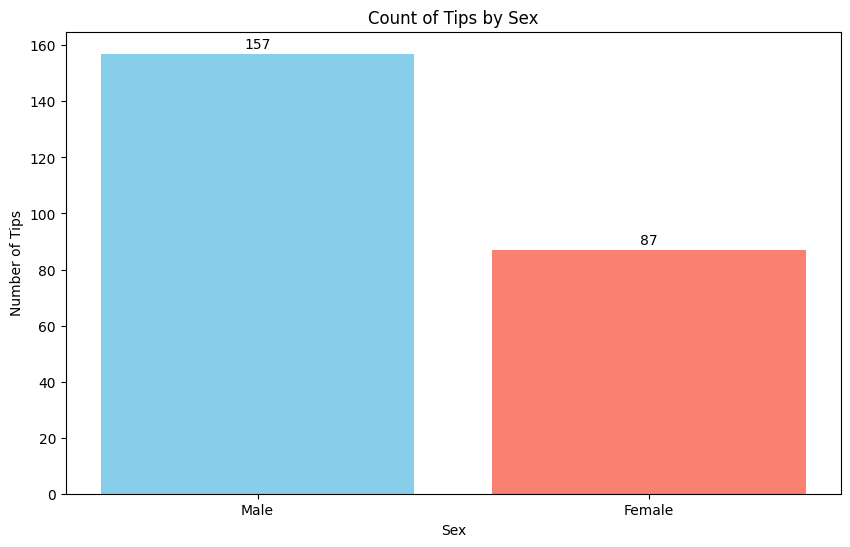

In [7]:
counts = data.groupby("sex")["tip"].count()
plt.figure(figsize=(10, 6))
plt.bar(counts.index, counts.values, color=['skyblue', 'salmon'])
plt.title('Count of Tips by Sex')
plt.xlabel('Sex')
plt.ylabel('Number of Tips')
for i, count in enumerate(counts):
    plt.text(i, count + 1, str(count), ha='center', va='bottom')
plt.show()

In [ ]:
**PRIMARY VISUALIZE TIP

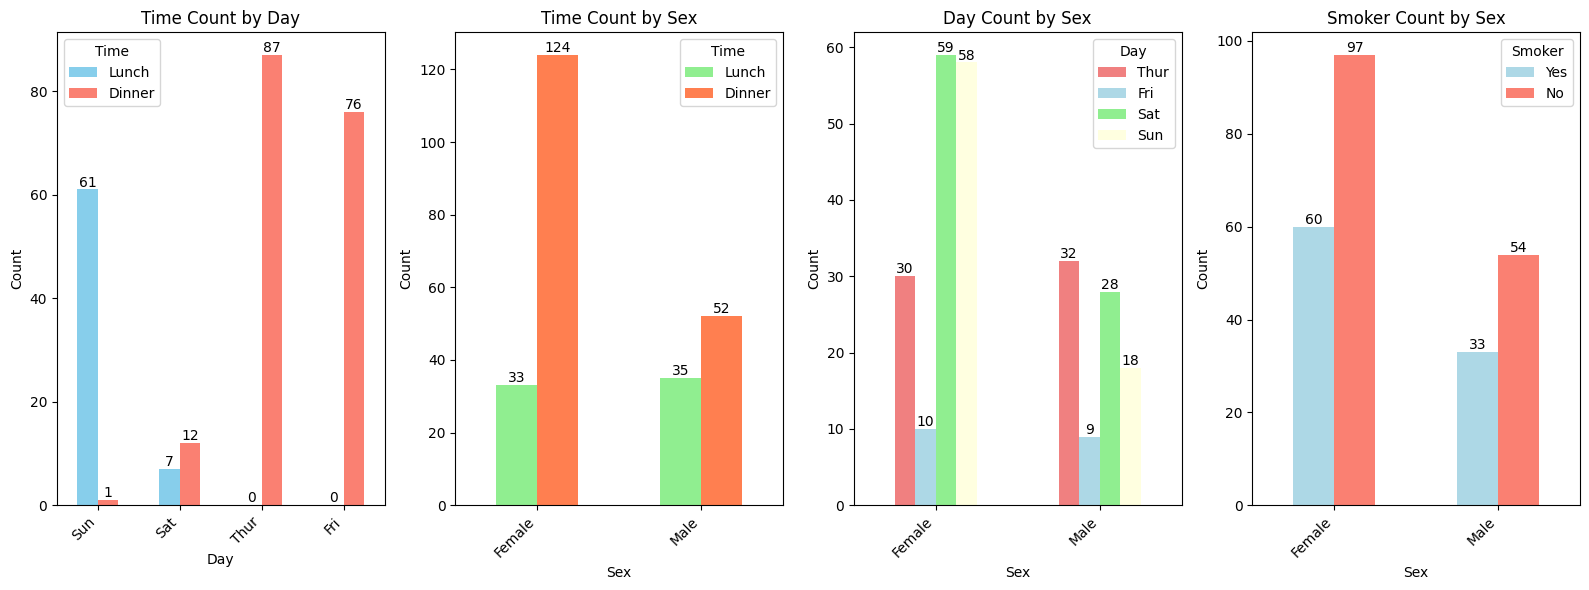

In [8]:
# Analysis 
plt.figure(figsize=(16, 6))
# day count by time
plt.subplot(1, 4, 1)
ax1 = data.groupby("day")["time"].value_counts().unstack().plot(kind="bar", ax=plt.gca(), color=['skyblue', 'salmon'])
ax1.set_title('Time Count by Day')
ax1.set_xlabel('Day')
ax1.set_ylabel('Count')
ax1.legend(title='Time')
ax1.set_xticks(range(len(data['day'].unique())))
ax1.set_xticklabels(data['day'].unique(), rotation=45, ha='right')

# add count of bar
for p in ax1.patches:
    ax1.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2, p.get_height()),
                 ha='center', va='center', xytext=(0, 5), textcoords='offset points')
# time count by sex
plt.subplot(1, 4, 2)
ax2 = data.groupby("sex")["time"].value_counts().unstack().plot(kind="bar", ax=plt.gca(), color=['lightgreen', 'coral'])
ax2.set_title('Time Count by Sex')
ax2.set_xlabel('Sex')
ax2.set_ylabel('Count')
ax2.legend(title='Time')
ax2.set_xticks(range(len(data['sex'].unique())))
ax2.set_xticklabels(data['sex'].unique(), rotation=45, ha='right')
# add count of bar
for p in ax2.patches:
    ax2.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2, p.get_height()),
                 ha='center', va='center', xytext=(0, 5), textcoords='offset points')
# day count by sex
plt.subplot(1, 4, 3)
ax3 = data.groupby("sex")["day"].value_counts().unstack().plot(kind="bar", ax=plt.gca(), color=['lightcoral', 'lightblue', 'lightgreen', 'lightyellow'])
ax3.set_title('Day Count by Sex')
ax3.set_xlabel('Sex')
ax3.set_ylabel('Count')
ax3.legend(title='Day')
ax3.set_xticks(range(len(data['sex'].unique())))
ax3.set_xticklabels(data['sex'].unique(), rotation=45, ha='right')
# add count of bar
for p in ax3.patches:
    ax3.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2, p.get_height()),
                 ha='center', va='center', xytext=(0, 5), textcoords='offset points')
#  smoker count by sex
plt.subplot(1, 4, 4)
ax4 = data.groupby("sex")["smoker"].value_counts().unstack().plot(kind="bar", ax=plt.gca(), color=['lightblue', 'salmon'])
ax4.set_title('Smoker Count by Sex')
ax4.set_xlabel('Sex')
ax4.set_ylabel('Count')
ax4.legend(title='Smoker')
ax4.set_xticks(range(len(data['sex'].unique())))
ax4.set_xticklabels(data['sex'].unique(), rotation=45, ha='right')
# add count of bar
for p in ax4.patches:
    ax4.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2, p.get_height()),
                 ha='center', va='center', xytext=(0, 5), textcoords='offset points')
plt.tight_layout()
plt.show()


In [9]:
#regression report from statsmodel.api
'''import statsmodels.api as sm
tips_encoded = pd.get_dummies(data, columns=['sex', 'smoker', 'day', 'time'], drop_first=True)
X=tips_encoded.drop("tip",axis=1)
y=tips_encoded["tip"]
X=sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary())'''

'import statsmodels.api as sm\ntips_encoded = pd.get_dummies(data, columns=[\'sex\', \'smoker\', \'day\', \'time\'], drop_first=True)\nX=tips_encoded.drop("tip",axis=1)\ny=tips_encoded["tip"]\nX=sm.add_constant(X)\nmodel = sm.OLS(y, X).fit()\nprint(model.summary())'

In [10]:
#print(model.pvalues.sort_values(ascending=False))

**Basic Query**

**1.Calcualte the total amount of tips**

In [11]:
# Calculate the total amount of tips:What is the total amount of tips given?
total_tips = data['tip'].sum()
print(f"Total amount of tips given: ${total_tips:.2f}")

Total amount of tips given: $731.58


**2. What is the average tip amount per month?**

In [12]:
#2. What is the average tip amount per month?
# Since the dataset does not have month information, we'll use day of the week instead.
average_tip_per_day = data.groupby('day')['tip'].mean()
print("2. Average tip amount per day:")
print(average_tip_per_day)

2. Average tip amount per day:
day
Thur    2.771452
Fri     2.734737
Sat     2.993103
Sun     3.255132
Name: tip, dtype: float64


**3. How does the average tip amount vary by day of the week and time of day?**

In [13]:
#3. How does the average tip amount vary by day of the week and time of day?
average_tip_by_day_time = data.groupby(['day', 'time'])['tip'].mean().unstack()
print("3. Average tip amount by day and time:")
print(average_tip_by_day_time)

3. Average tip amount by day and time:
time     Lunch    Dinner
day                     
Thur  2.767705  3.000000
Fri   2.382857  2.940000
Sat        NaN  2.993103
Sun        NaN  3.255132


**4. Is there a difference in the average tip amount between genders?**

In [14]:
#4. Is there a difference in the average tip amount between genders?
average_tip_by_gender = data.groupby('sex')['tip'].mean()
print("4. Average tip amount by gender:")
print(average_tip_by_gender)

4. Average tip amount by gender:
sex
Male      3.089618
Female    2.833448
Name: tip, dtype: float64


**5. Is there a difference in tip amounts between lunch and dinner?**

In [15]:
#5. Is there a difference in tip amounts between lunch and dinner?
average_tip_by_meal = data.groupby('time')['tip'].mean()
print("5. Average tip amount by meal time:")
print(average_tip_by_meal)

5. Average tip amount by meal time:
time
Lunch     2.728088
Dinner    3.102670
Name: tip, dtype: float64


**6. What is the relationship between the tip amount and the total bill amount?**

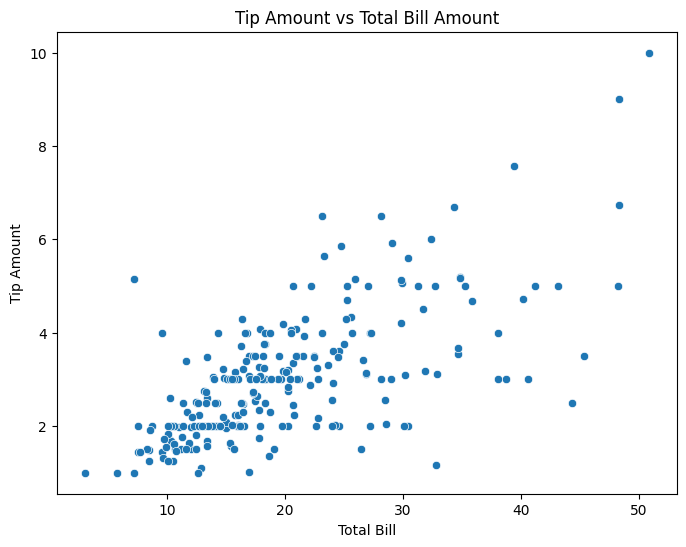

In [16]:
#6. What is the relationship between the tip amount and the total bill amount?
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x='total_bill', y='tip')
plt.title('Tip Amount vs Total Bill Amount')
plt.xlabel('Total Bill')
plt.ylabel('Tip Amount')
plt.show()

**7. How does the tip amount vary with the size of the party?**

In [17]:
#7. How does the tip amount vary with the size of the party?
average_tip_by_size = data.groupby('size')['tip'].mean()
print("7. Average tip amount by party size:")
print(average_tip_by_size)

7. Average tip amount by party size:
size
1    1.437500
2    2.582308
3    3.393158
4    4.135405
5    4.028000
6    5.225000
Name: tip, dtype: float64


**8.Find the day and time with the highest average tip**

In [18]:
#Find the day and time with the highest average tip
highest_tip_day = data.groupby('day')['tip'].mean().idxmax()
highest_tip_time = data.groupby('time')['tip'].mean().idxmax()
print(f"Day with highest average tip: {highest_tip_day}")
print(f"Time with highest average tip: {highest_tip_time}")

Day with highest average tip: Sun
Time with highest average tip: Dinner


**10. How do tips vary with different days or seasons?**

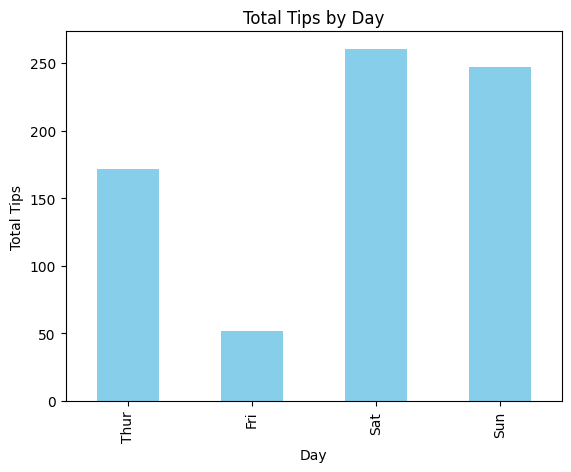

In [19]:
#10. How do tips vary with different days or seasons?
# Since the dataset does not have season information, we will focus on days.
tips_by_day = data.groupby('day')['tip'].sum()
tips_by_day.plot(kind='bar', color='skyblue')
plt.title('Total Tips by Day')
plt.xlabel('Day')
plt.ylabel('Total Tips')
plt.show()

**11.What is the distribution of tips given as a percentage of the total bill?**

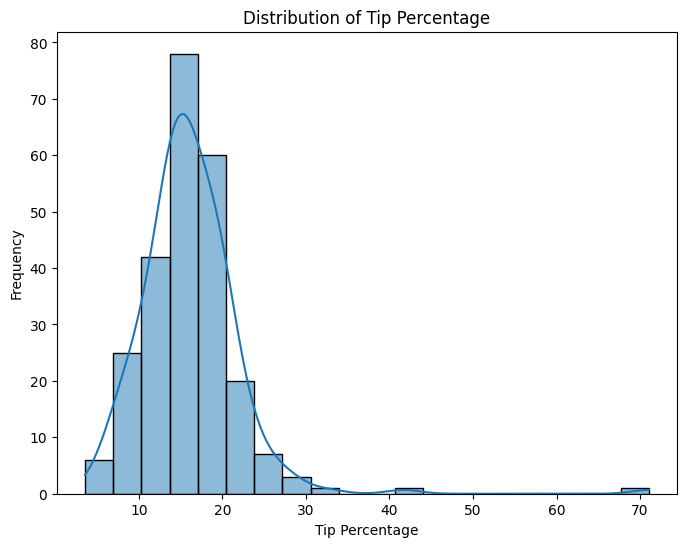

In [20]:
#What is the distribution of tips given as a percentage of the total bill?
data['tip_percentage'] = (data['tip'] / data['total_bill']) * 100
plt.figure(figsize=(8, 6))
sns.histplot(data['tip_percentage'], bins=20, kde=True)
plt.title('Distribution of Tip Percentage')
plt.xlabel('Tip Percentage')
plt.ylabel('Frequency')
plt.show()


**12.How does the distribution of total bills vary by time of day (lunch vs dinner)?** 

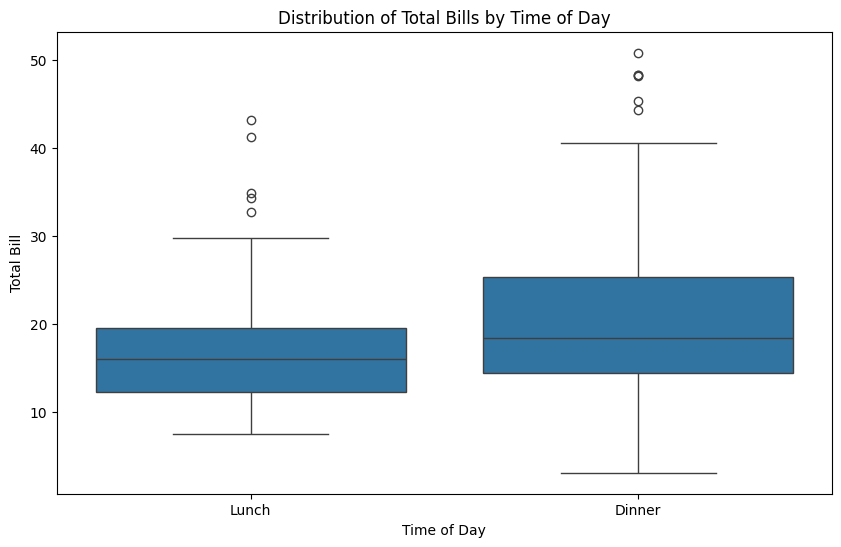

In [21]:
#How does the distribution of total bills vary by time of day (lunch vs dinner)? 
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='time', y='total_bill')
plt.title('Distribution of Total Bills by Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Total Bill')
plt.show()

**13.What is the correlation between total bill and tip amounts?**

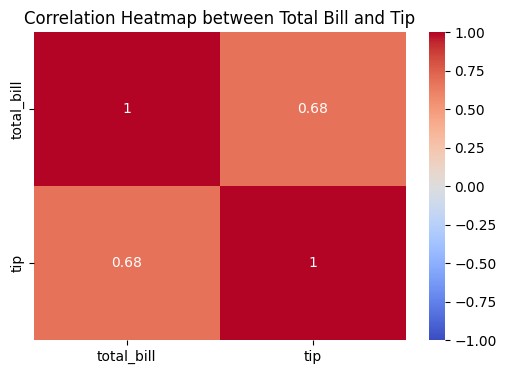

In [22]:
#13.What is the correlation between total bill and tip amounts? 
correlation_matrix = data[['total_bill', 'tip']].corr()
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap between Total Bill and Tip')
plt.show()


**14. How do tips vary by party size and day of the week?**

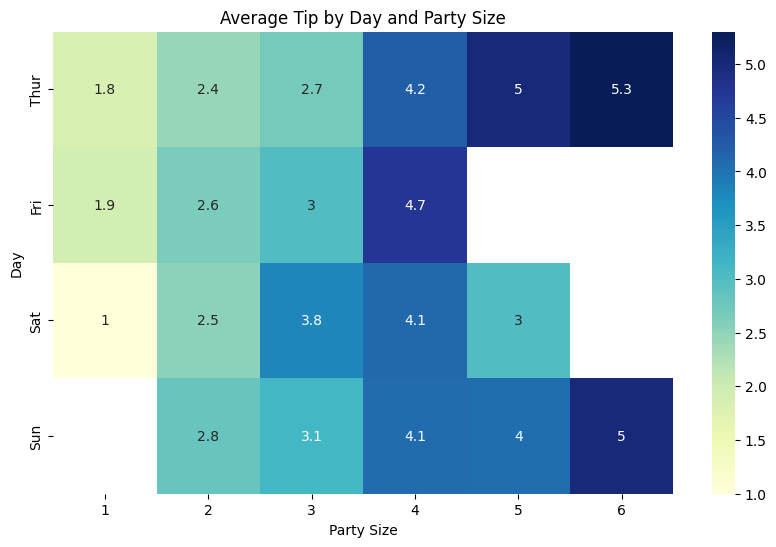

In [23]:
#14. How do tips vary by party size and day of the week?
pivot_table = data.pivot_table(values='tip', index='day', columns='size', aggfunc='mean')
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, annot=True, cmap='YlGnBu', cbar=True)
plt.title('Average Tip by Day and Party Size')
plt.xlabel('Party Size')
plt.ylabel('Day')
plt.show()

**15.What are the average tip amounts by day of the week and size of the party?**

<Figure size 1200x800 with 0 Axes>

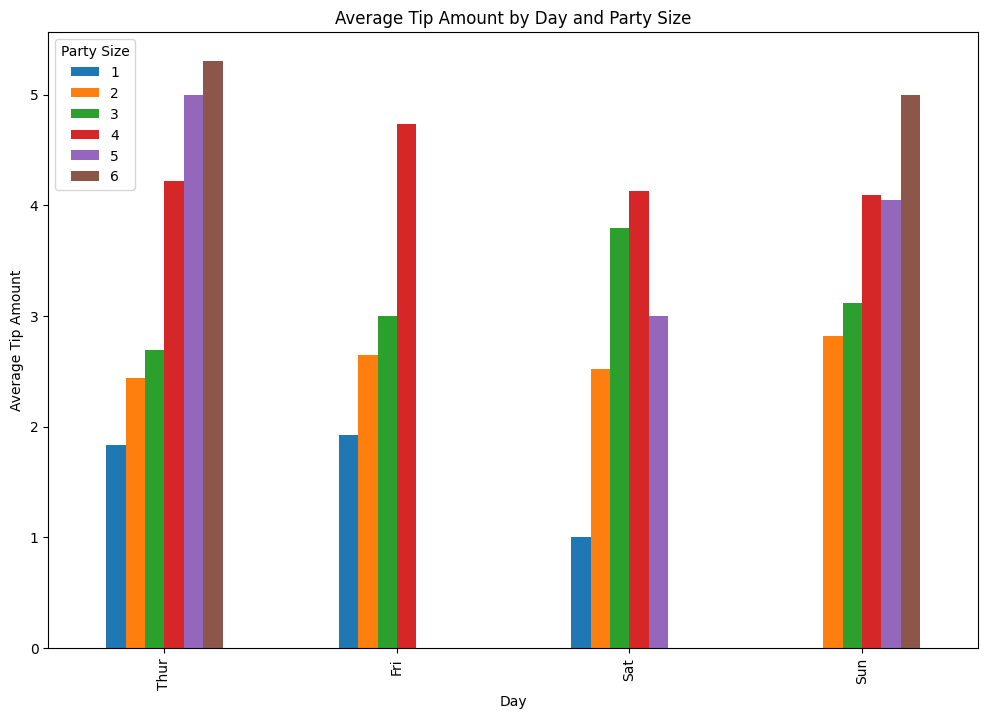

In [24]:
#15.What are the average tip amounts by day of the week and size of the party?
avg_tip_by_day_size = data.groupby(['day', 'size'])['tip'].mean().unstack()
plt.figure(figsize=(12, 8))
avg_tip_by_day_size.plot(kind='bar', figsize=(12, 8))
plt.title('Average Tip Amount by Day and Party Size')
plt.xlabel('Day')
plt.ylabel('Average Tip Amount')
plt.legend(title='Party Size')
plt.show()

**16.What is the average tip amount for each combination of day and time of day?**

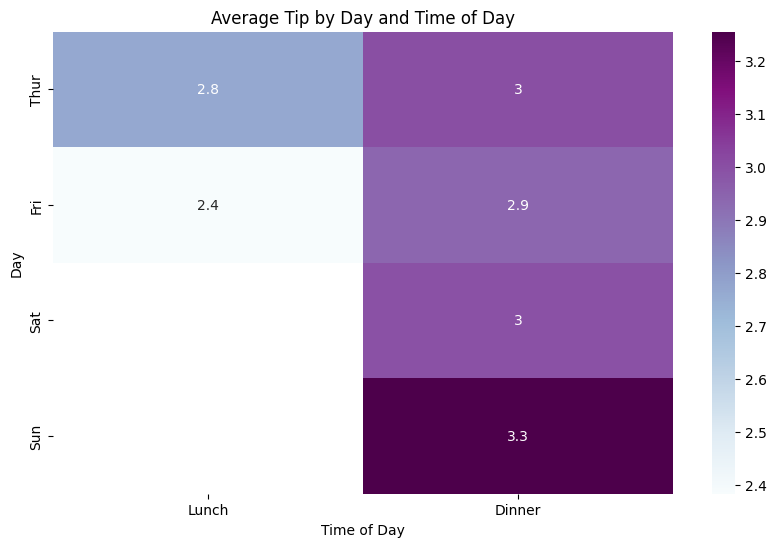

In [25]:
#16.What is the average tip amount for each combination of day and time of day?
pivot_table_day_time = data.pivot_table(values='tip', index='day', columns='time', aggfunc='mean')
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table_day_time, annot=True, cmap='BuPu', cbar=True)
plt.title('Average Tip by Day and Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Day')
plt.show()

**17.What is the proportion of total tips for each day of the week?** 

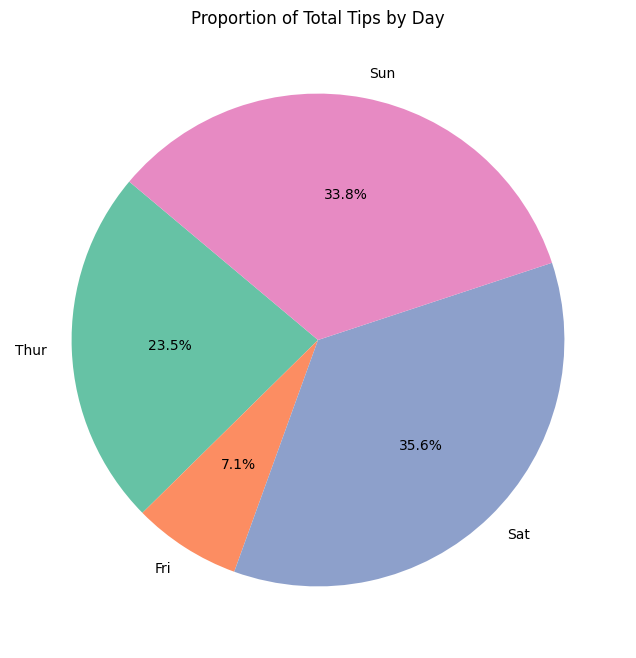

In [26]:
#17.What is the proportion of total tips for each day of the week? 
tips_by_day = data.groupby('day')['tip'].sum()
plt.figure(figsize=(8, 8))
plt.pie(tips_by_day, labels=tips_by_day.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("Set2"))
plt.title('Proportion of Total Tips by Day')
plt.show()

**18.How do tip amounts vary based on whether the customer is a smoker or non-smoker?**

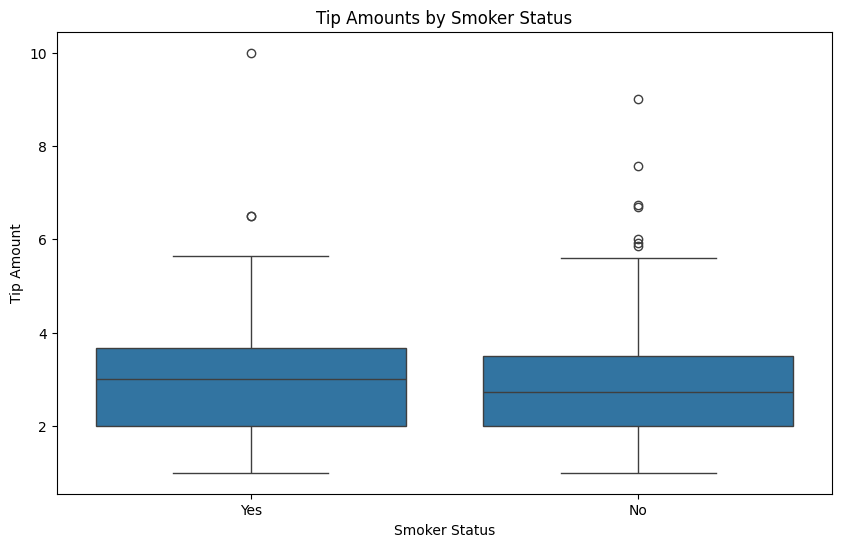

In [27]:
#18.How do tip amounts vary based on whether the customer is a smoker or non-smoker?
#Solution: Create a box plot to compare the distributions
# Note: The dataset does not include smoking/non-smoking information. This is a hypothetical example.
# If the dataset included such information, the code would be as follows:
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='smoker', y='tip')
plt.title('Tip Amounts by Smoker Status')
plt.xlabel('Smoker Status')
plt.ylabel('Tip Amount')
plt.show()


**19.What is the trend of tips over the days of the week?**

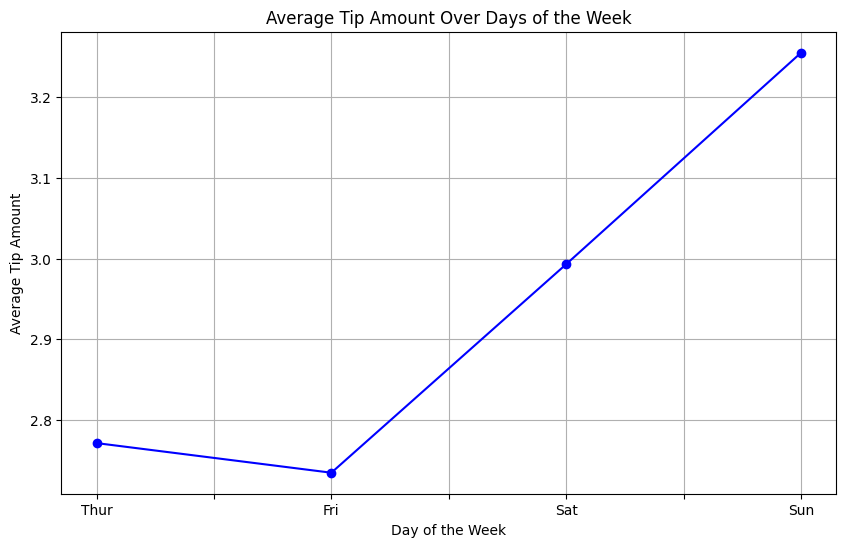

In [28]:
#19.What is the trend of tips over the days of the week?
#Solution: Plot the average tip amount over different days.
avg_tip_by_day = data.groupby('day')['tip'].mean()
plt.figure(figsize=(10, 6))
avg_tip_by_day.plot(kind='line', marker='o', color='b')
plt.title('Average Tip Amount Over Days of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Average Tip Amount')
plt.grid(True)
plt.show()


**20.Is there a difference in the distribution of total bills between different days of the week?**

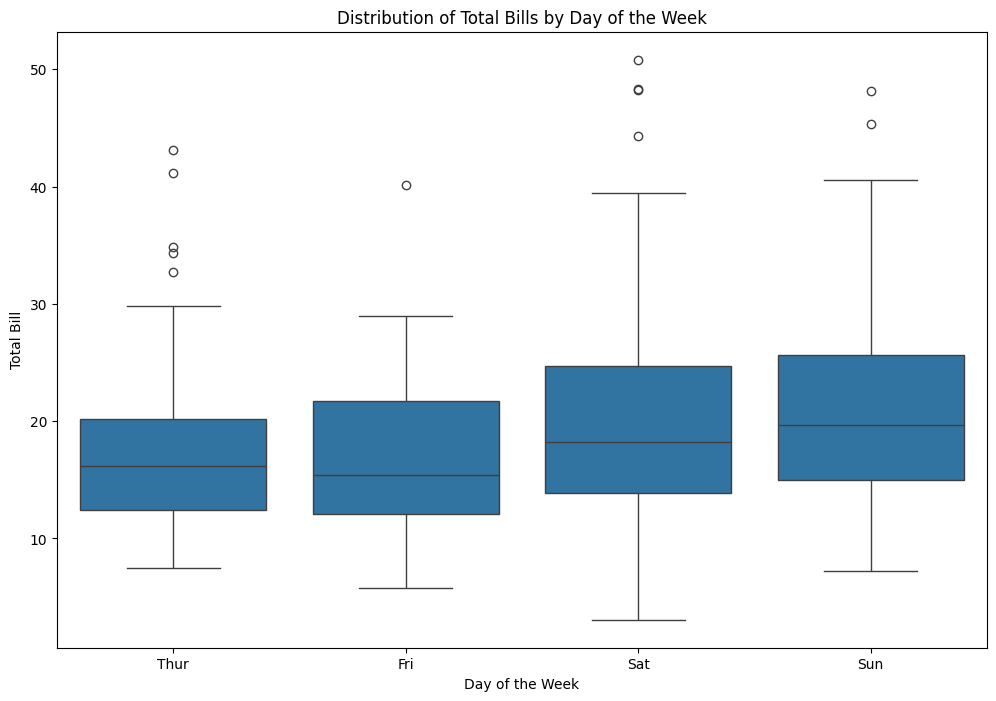

In [29]:
#20.Is there a difference in the distribution of total bills between different days of the week?
#Solution: Use a box plot to compare distributions
plt.figure(figsize=(12, 8))
sns.boxplot(data=data, x='day', y='total_bill')
plt.title('Distribution of Total Bills by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Total Bill')
plt.show()

**21. How do the tip amounts vary by day of the week and the size of the party, considering different time periods (lunch vs dinner)?
Solution: Create a multi-index pivot table and visualize it.**

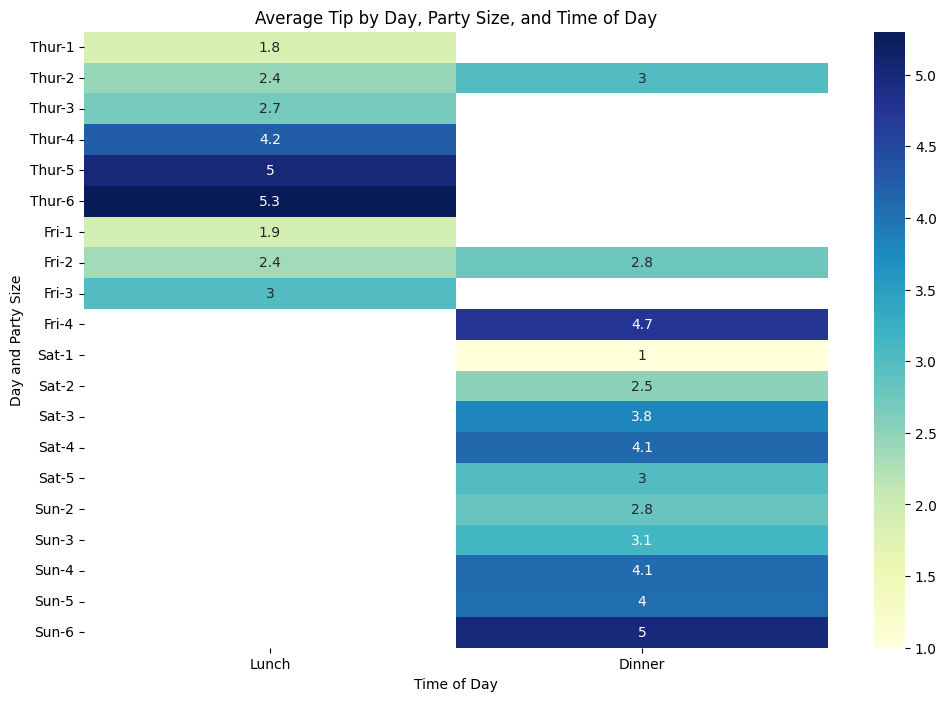

In [30]:

# Create a multi-index pivot table
pivot_table_day_size_time = data.pivot_table(values='tip', index=['day', 'size'], columns='time', aggfunc='mean')
# Plot the results
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table_day_size_time, annot=True, cmap='YlGnBu', cbar=True)
plt.title('Average Tip by Day, Party Size, and Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Day and Party Size')
plt.show()


**22. What are the total tips and average tips per day and time, segmented by party size?
Solution: Use a groupby operation with multiple aggregations.**

In [31]:
# Group by day, time, and party size with multiple aggregations
tip_stats = data.groupby(['day', 'time', 'size']).agg(
    total_tips=('tip', 'sum'),
    average_tip=('tip', 'mean')
).reset_index()
tip_stats.head()

,day,time,size,total_tips,average_tip
0,Thur,Lunch,1,1.83,1.830000
1,Thur,Lunch,2,114.24,2.430638
2,Thur,Lunch,3,10.77,2.692500
3,Thur,Lunch,4,21.09,4.218000
4,Thur,Lunch,5,5.00,5.000000


**23. How does the distribution of tip amounts differ by party size and day of the week?**
**Solution: Use a violin plot to show the distribution.**

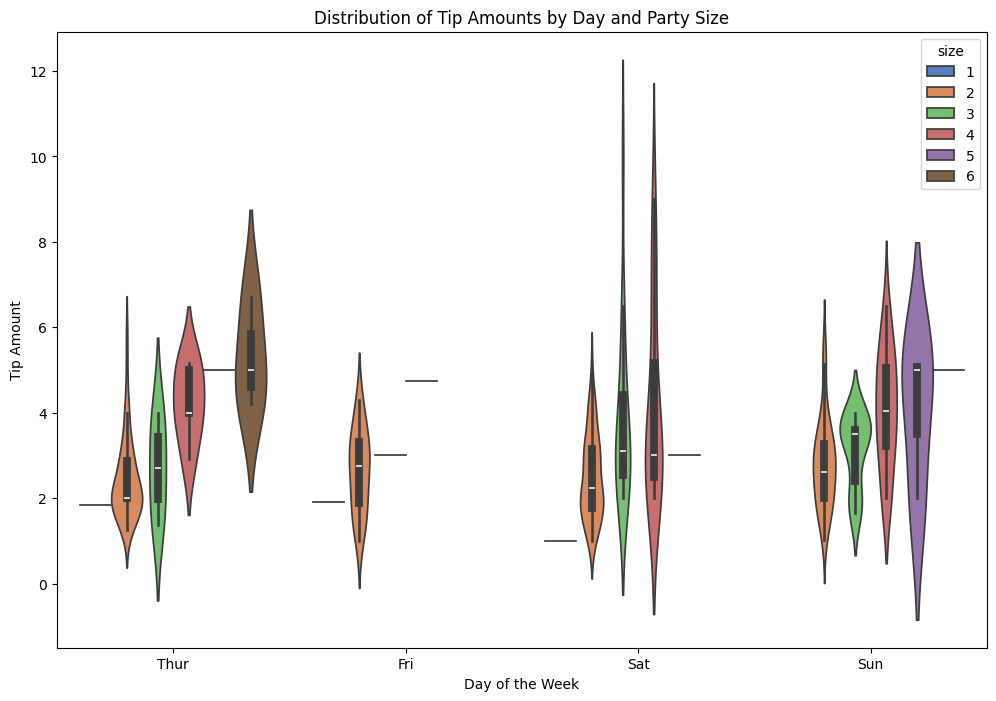

In [32]:
plt.figure(figsize=(12, 8))
sns.violinplot(data=data, x='day', y='tip', hue='size', palette='muted')
plt.title('Distribution of Tip Amounts by Day and Party Size')
plt.xlabel('Day of the Week')
plt.ylabel('Tip Amount')
plt.show()


**24. What is the impact of the total bill amount on the tip amount for different party sizes and times of day?
Solution: Use a FacetGrid to plot the relationships.**

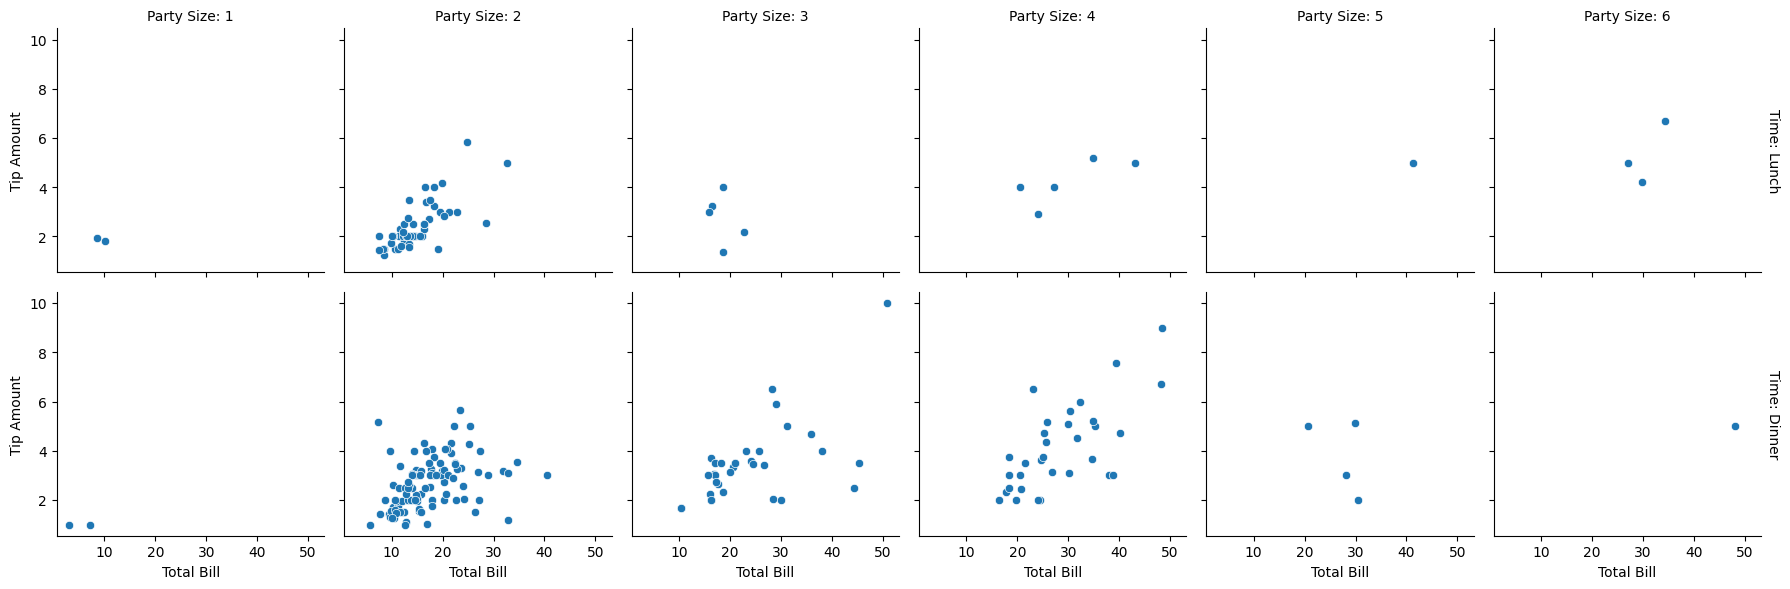

In [33]:
g = sns.FacetGrid(data, col='size', row='time', margin_titles=True)
g.map_dataframe(sns.scatterplot, x='total_bill', y='tip')
g.set_axis_labels('Total Bill', 'Tip Amount')
g.set_titles(col_template='Party Size: {col_name}', row_template='Time: {row_name}')
plt.show()


**25. How do tips vary with the size of the party and the bill amount, considering the time of day?
Solution: Use a regression plot with different faceting.**

<Figure size 1200x800 with 0 Axes>

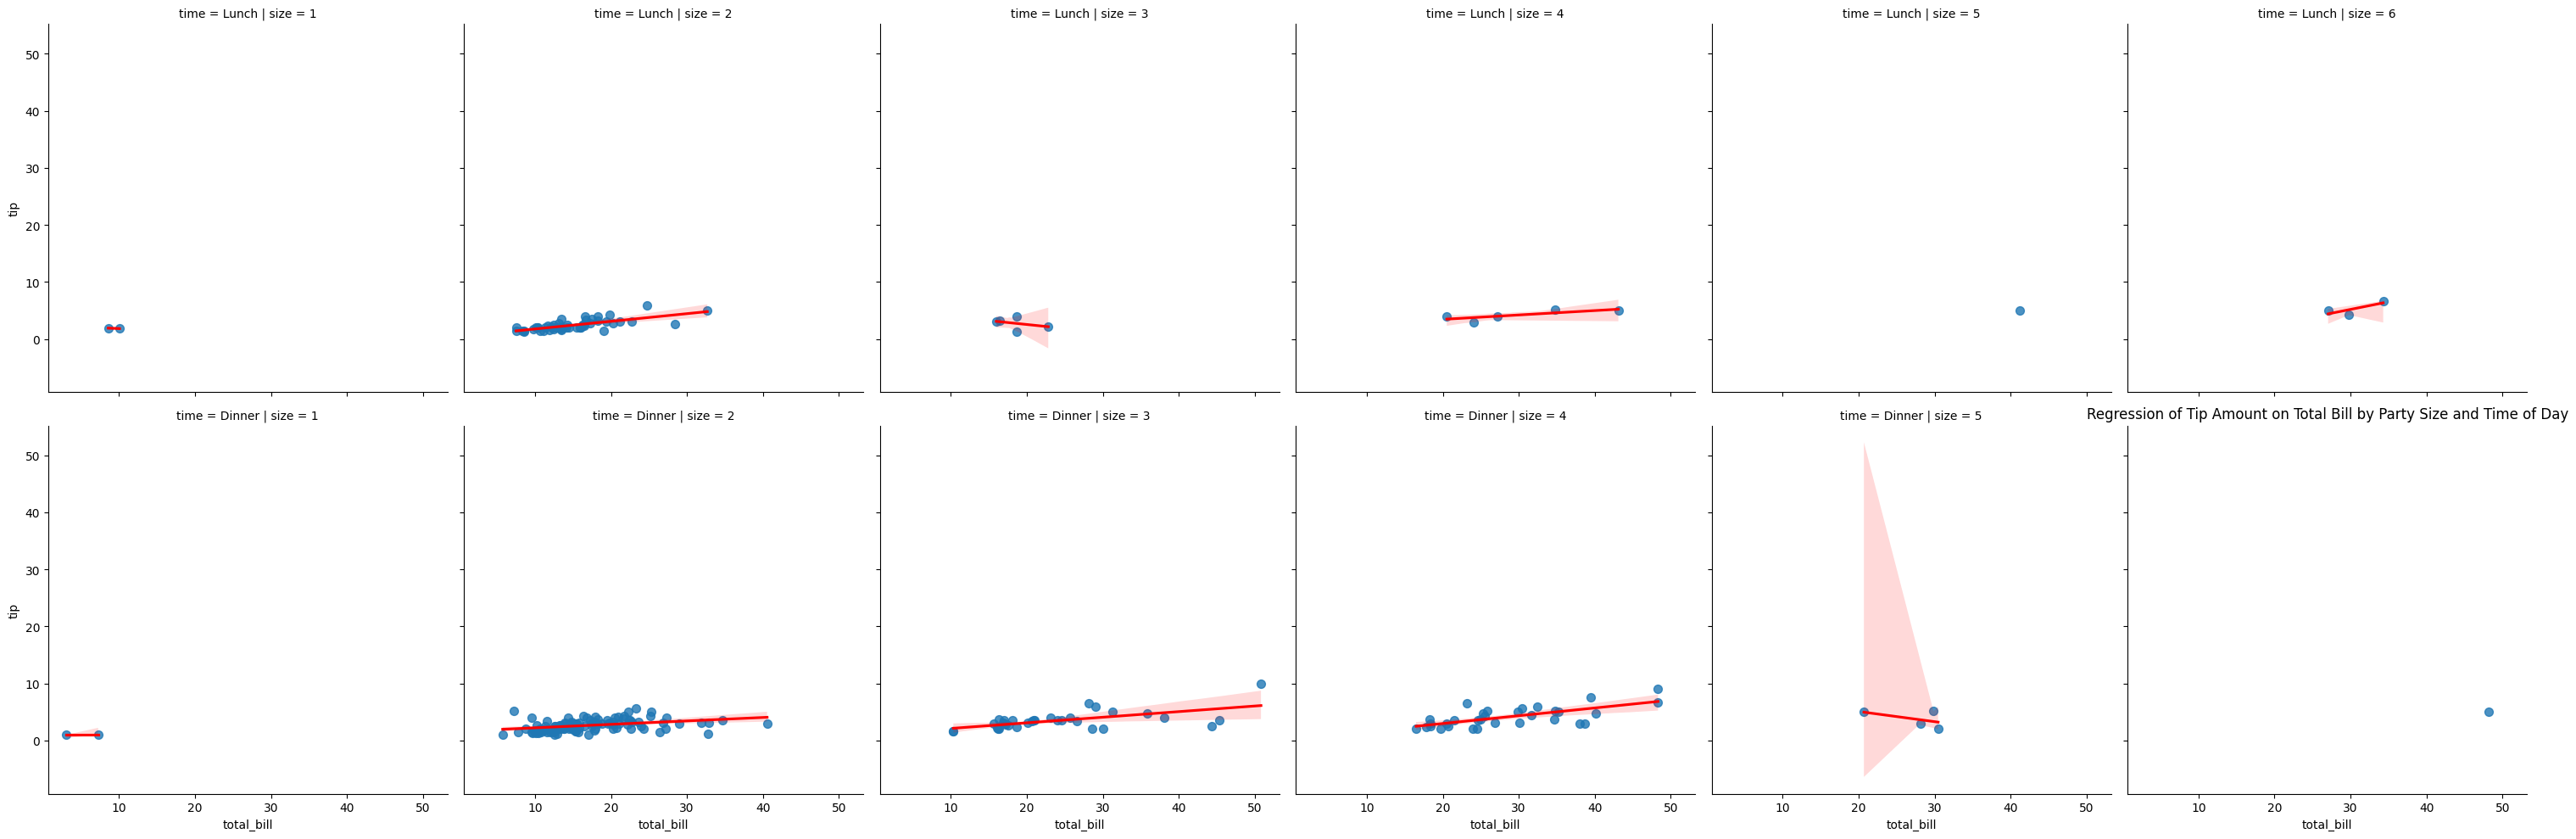

In [34]:
plt.figure(figsize=(12, 8))
sns.lmplot(data=data, x='total_bill', y='tip', col='size', row='time', scatter_kws={'s': 50}, line_kws={'color': 'red'})
plt.title('Regression of Tip Amount on Total Bill by Party Size and Time of Day')
plt.show()


**26. Which party sizes tend to give higher tips on specific days and times?
Solution: Use a pivot table with aggregation and visualization.**

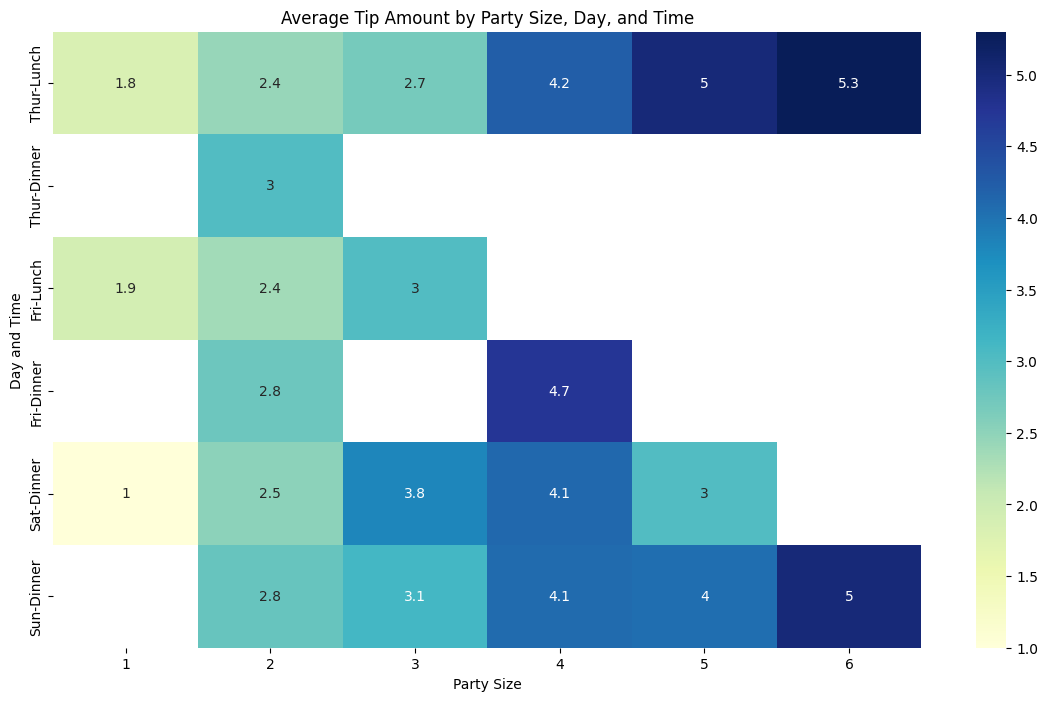

In [35]:
# Create a pivot table
pivot_table = data.pivot_table(values='tip', index=['day', 'time'], columns='size', aggfunc='mean')

# Plot the results
plt.figure(figsize=(14, 8))
sns.heatmap(pivot_table, annot=True, cmap='YlGnBu', cbar=True)
plt.title('Average Tip Amount by Party Size, Day, and Time')
plt.xlabel('Party Size')
plt.ylabel('Day and Time')
plt.show()


**27. What are the average tip amounts across different combinations of day, time, and size, and how do they compare?
Solution: Use a grouped bar plot for comparison.**

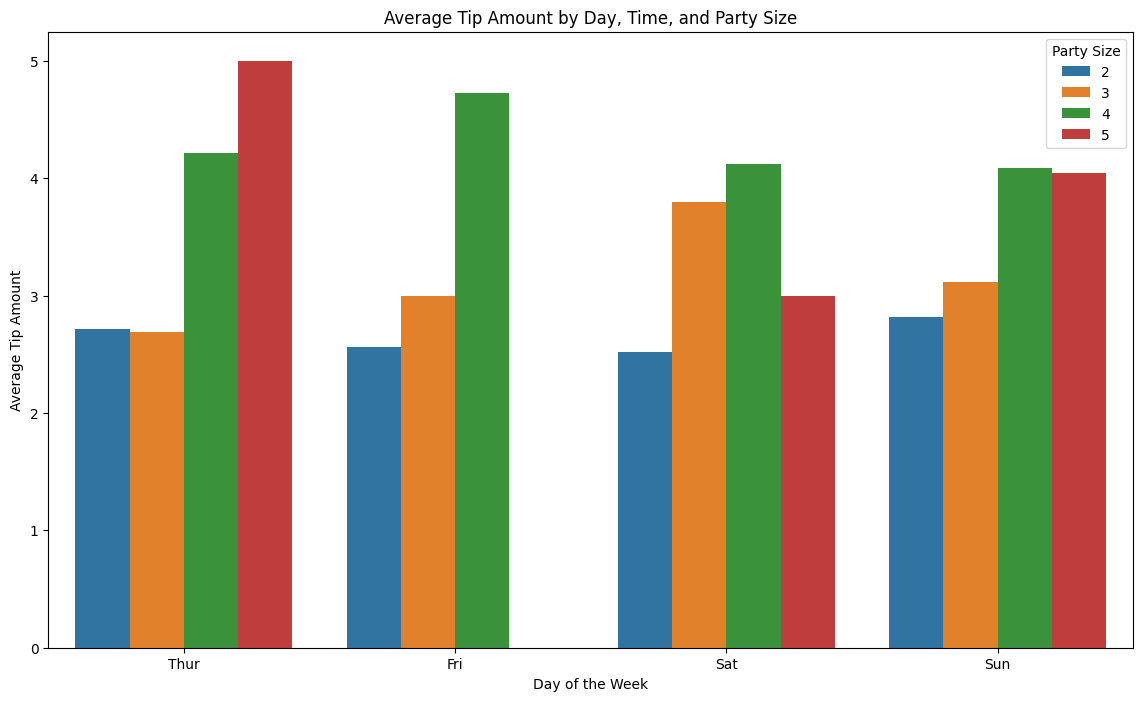

In [36]:
avg_tip = data.groupby(['day', 'time', 'size'])['tip'].mean().reset_index()

plt.figure(figsize=(14, 8))
sns.barplot(data=avg_tip, x='day', y='tip', hue='size', palette='tab10', ci=None, estimator='mean', hue_order=[2, 3, 4, 5])
plt.title('Average Tip Amount by Day, Time, and Party Size')
plt.xlabel('Day of the Week')
plt.ylabel('Average Tip Amount')
plt.legend(title='Party Size')
plt.show()


**28. How do the total bill amounts and tips compare across different times of day for varying party sizes?
Solution: Use a facet grid with subplots to compare across different party sizes.**

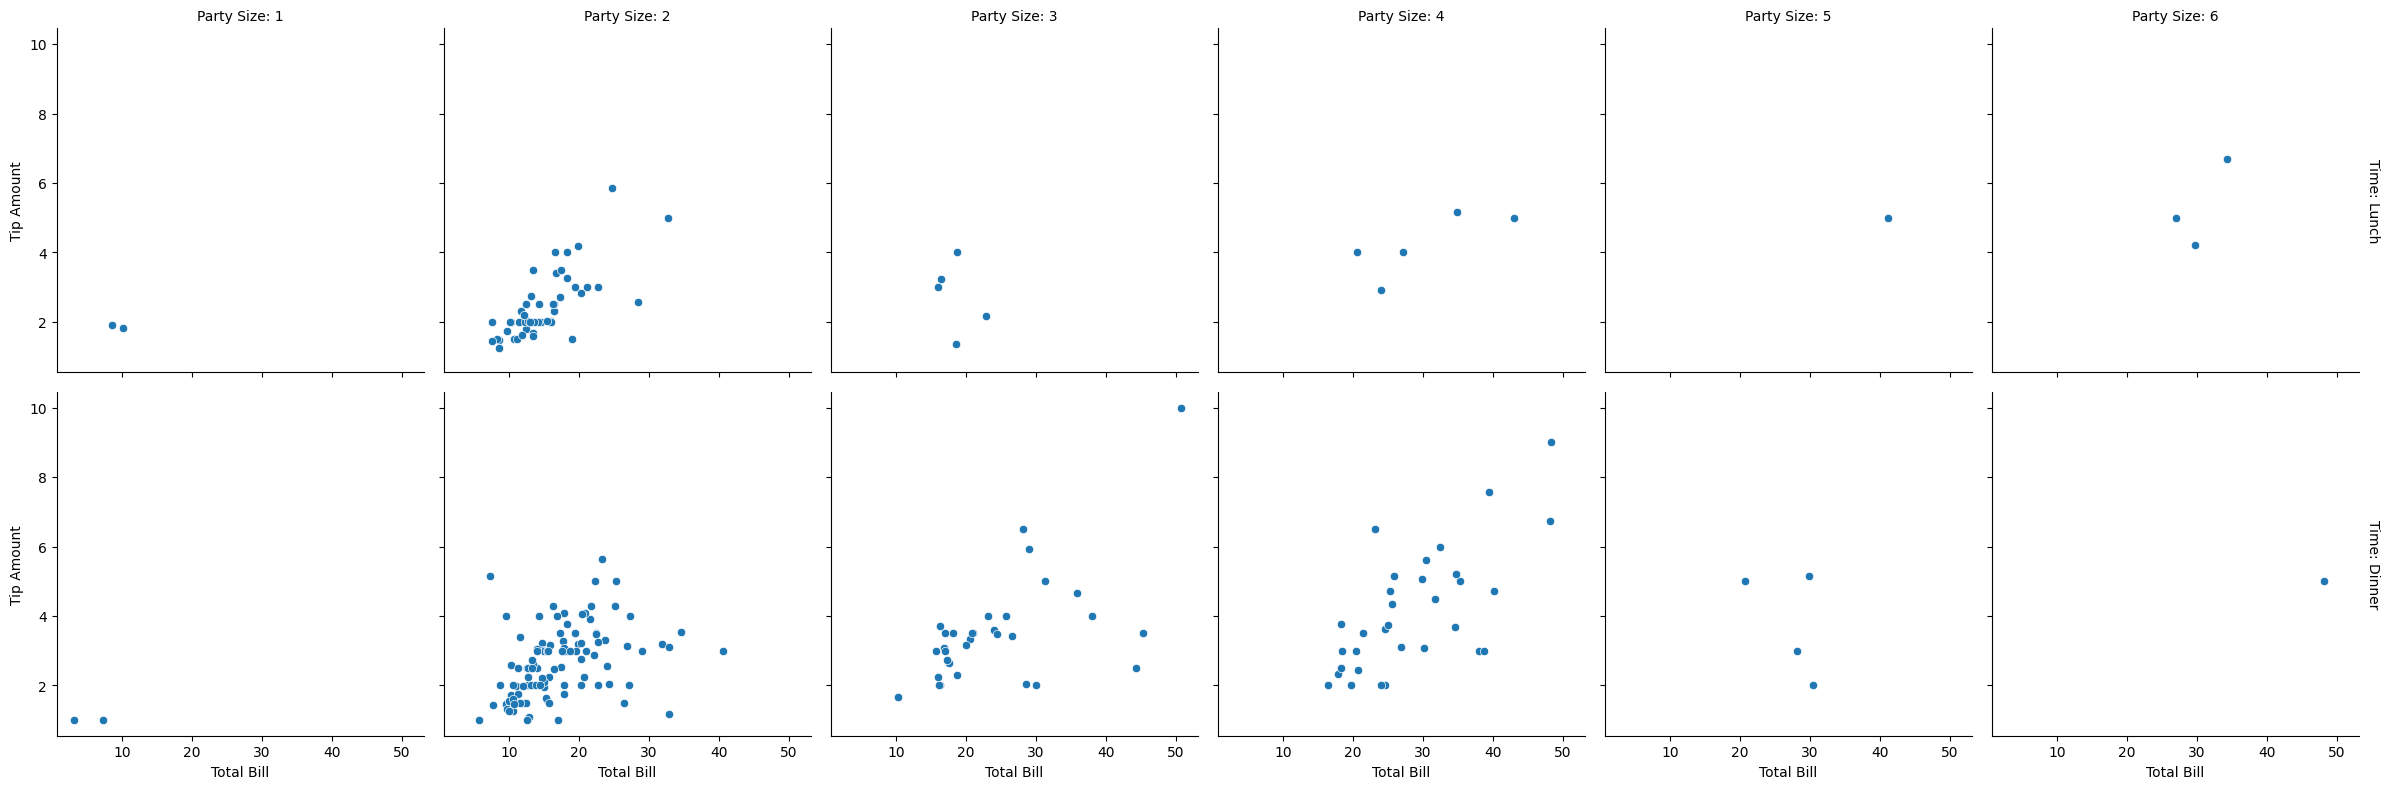

In [37]:
g = sns.FacetGrid(data, col='size', row='time', margin_titles=True, height=4)
g.map_dataframe(sns.scatterplot, x='total_bill', y='tip')
g.set_axis_labels('Total Bill', 'Tip Amount')
g.set_titles(col_template='Party Size: {col_name}', row_template='Time: {row_name}')
plt.show()


**29. What are the tip amount distributions for each party size across different days of the week?
Solution: Use a box plot to show distributions.**

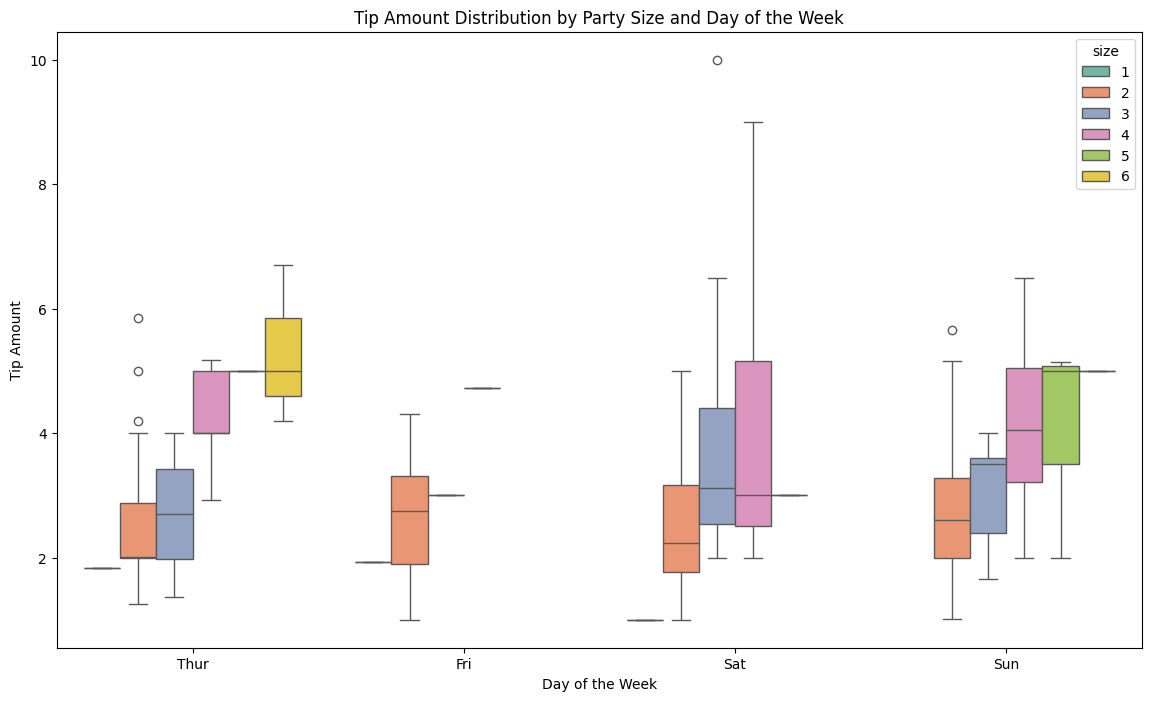

In [38]:
plt.figure(figsize=(14, 8))
sns.boxplot(data=data, x='day', y='tip', hue='size', palette='Set2')
plt.title('Tip Amount Distribution by Party Size and Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Tip Amount')
plt.show()


**30. How does the average tip amount vary by day and time, considering the bill amount?
Solution: Use a pivot table with aggregation and visualize with a heatmap.**

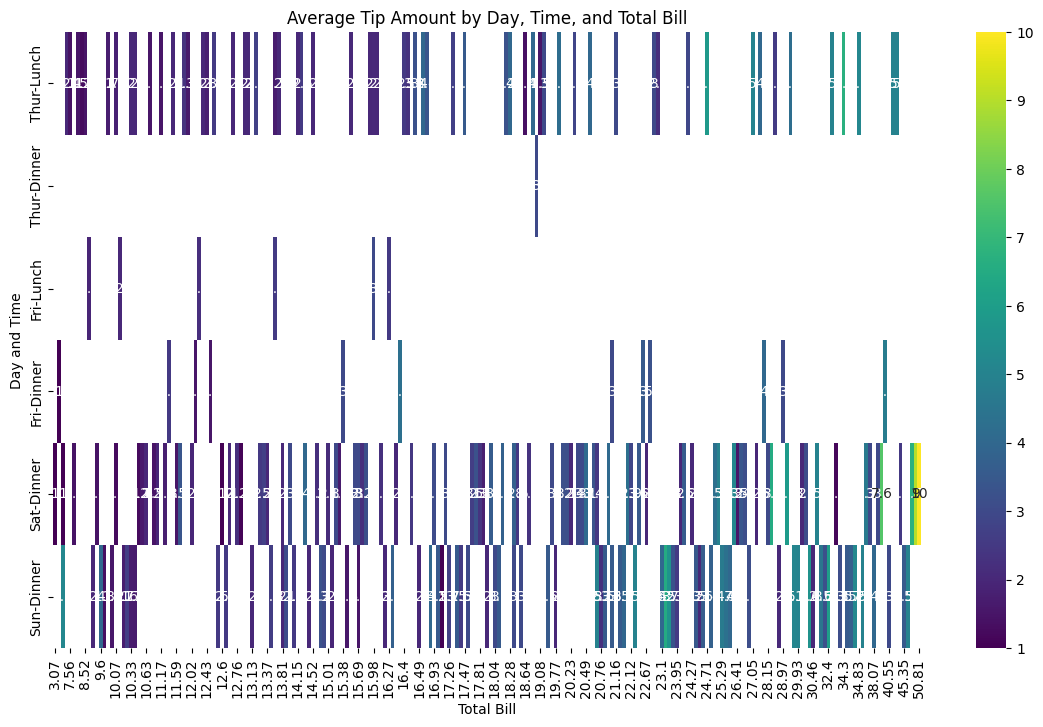

In [39]:
pivot_table = data.pivot_table(values='tip', index=['day', 'time'], columns='total_bill', aggfunc='mean')
plt.figure(figsize=(14, 8))
sns.heatmap(pivot_table, annot=True, cmap='viridis', cbar=True)
plt.title('Average Tip Amount by Day, Time, and Total Bill')
plt.xlabel('Total Bill')
plt.ylabel('Day and Time')
plt.show()


**31. Calculate the standard deviation of tips for each combination of day, time, and party size.
Solution: Use grouping and aggregation to calculate the standard deviation.**

In [40]:
# Group by day, time, and party size, then calculate standard deviation of tips
std_tip = data.groupby(['day', 'time', 'size'])['tip'].std().reset_index()
std_tip.rename(columns={'tip': 'std_tip'}, inplace=True)
std_tip.head()

,day,time,size,std_tip
0,Thur,Lunch,1,NaN
1,Thur,Lunch,2,0.957813
2,Thur,Lunch,3,1.159982
3,Thur,Lunch,4,0.907976
4,Thur,Lunch,5,NaN


**32. Find the median tip amount for each combination of day of the week and party size, and determine which combination has the highest median tip.
Solution: Use grouping, aggregation, and sorting to find the highest median.**

In [41]:
# Calculate median tip amount
median_tip = data.groupby(['day', 'size'])['tip'].median().reset_index()
median_tip.rename(columns={'tip': 'median_tip'}, inplace=True)
# Find the combination with the highest median tip
highest_median_tip = median_tip.loc[median_tip['median_tip'].idxmax()]
print(highest_median_tip)

day           Thur
size             5
median_tip     5.0
Name: 4, dtype: object


**33. Determine the total number of tips given by each combination of day and time, then find the day and time with the highest total number of tips.
Solution: Use grouping and aggregation to find totals and the maximum.**

In [42]:
# Calculate total number of tips
total_tips = data.groupby(['day', 'time'])['tip'].count().reset_index()
total_tips.rename(columns={'tip': 'total_tips'}, inplace=True)
# Find the day and time with the highest total number of tips
highest_total_tips = total_tips.loc[total_tips['total_tips'].idxmax()]
print(highest_total_tips)


day              Sat
time          Dinner
total_tips        87
Name: 5, dtype: object


**34. Compute the correlation matrix between total bill, tip, and party size, and identify which pairs of variables have the highest correlation.
Solution: Use the corr() method to compute correlations.**

In [43]:
selected_columns = data[['total_bill', 'tip', 'size']]
correlation_matrix = selected_columns.corr()
print("Correlation Matrix:\n", correlation_matrix)
highest_correlation = correlation_matrix.unstack().sort_values(ascending=False)
# Remove the diagonal correlations (1.0) as they represent self-correlation
highest_correlation = highest_correlation[highest_correlation != 1.0]
# Display the highest correlated pairs
print("\nPairs with the highest correlation:\n", highest_correlation)


Correlation Matrix:
             total_bill       tip      size
total_bill    1.000000  0.675734  0.598315
tip           0.675734  1.000000  0.489299
size          0.598315  0.489299  1.000000

Pairs with the highest correlation:
 total_bill  tip           0.675734
tip         total_bill    0.675734
total_bill  size          0.598315
size        total_bill    0.598315
tip         size          0.489299
size        tip           0.489299
dtype: float64


**35. For each combination of day and time, calculate the average total bill amount and determine which combination has the highest average bill amount.
Solution: Use grouping and aggregation to find the highest average bill.**

In [44]:
# Calculate average total bill amount
avg_bill = data.groupby(['day', 'time'])['total_bill'].mean().reset_index()
avg_bill.rename(columns={'total_bill': 'avg_total_bill'}, inplace=True)
# Find the combination with the highest average bill amount
highest_avg_bill = avg_bill.loc[avg_bill['avg_total_bill'].idxmax()]
print(highest_avg_bill)

day                  Sun
time              Dinner
avg_total_bill     21.41
Name: 7, dtype: object


**36. Determine the range of tip amounts (difference between maximum and minimum) for each day and time combination.
Solution: Use grouping and aggregation to calculate ranges.**

In [45]:
# Calculate the range of tip amounts (max - min)
tip_range = data.groupby(['day', 'time'])['tip'].agg(lambda x: x.max() - x.min()).reset_index()
tip_range.rename(columns={'tip': 'tip_range'}, inplace=True)
print(tip_range)

    day    time  tip_range
0  Thur   Lunch       5.45
1  Thur  Dinner       0.00
2   Fri   Lunch       1.90
3   Fri  Dinner       3.73
4   Sat   Lunch        NaN
5   Sat  Dinner       9.00
6   Sun   Lunch        NaN
7   Sun  Dinner       5.49


**37. Find the average tip amount for each day and party size where the bill amount is above the median bill amount for that day.
Solution: Filter data based on median bill and compute the average tip.**

In [46]:
# Calculate the median bill amount for each day
median_bill_per_day = data.groupby('day')['total_bill'].median().reset_index()
median_bill_per_day.rename(columns={'total_bill': 'median_bill'}, inplace=True)

# Merge with the original data
data_with_median = pd.merge(data, median_bill_per_day, on='day')

# Filter where total bill is above the median
filtered_data = data_with_median[data_with_median['total_bill'] > data_with_median['median_bill']]

# Calculate average tip amount
avg_tip_above_median = filtered_data.groupby(['day', 'size'])['tip'].mean().reset_index()
avg_tip_above_median.rename(columns={'tip': 'avg_tip_above_median'}, inplace=True)
avg_tip_above_median

,day,size,avg_tip_above_median
0,Thur,2,3.310556
1,Thur,3,2.692500
2,Thur,4,4.218000
3,Thur,5,5.000000
4,Thur,6,5.300000
5,Fri,2,3.364286
6,Fri,3,3.000000
7,Fri,4,4.730000
8,Fri,5,NaN
9,Fri,6,NaN


**38. Identify the day and time combination with the highest variance in tip amounts.
Solution: Calculate variance and find the maximum.**

In [47]:
# Calculate variance of tip amounts
tip_variance = data.groupby(['day', 'time'])['tip'].var().reset_index()
tip_variance.rename(columns={'tip': 'tip_variance'}, inplace=True)

# Find the combination with the highest variance
highest_variance = tip_variance.loc[tip_variance['tip_variance'].idxmax()]
print(highest_variance)

day                  Sat
time              Dinner
tip_variance    2.660208
Name: 5, dtype: object


**39. Determine the percentage of tips that exceed 20% of the total bill amount for each party size.
Solution: Calculate the percentage of tips exceeding 20% of the total bill amount for each party size.**

In [48]:
# Calculate percentage of tips that exceed 20% of the total bill
data['tip_exceeds_20_percent'] = data['tip'] > 0.2 * data['total_bill']
percentage_exceeding = data.groupby('size')['tip_exceeds_20_percent'].mean() * 100
print(percentage_exceeding)

size
1    50.000000
2    18.589744
3    13.157895
4     5.405405
5    20.000000
6     0.000000
Name: tip_exceeds_20_percent, dtype: float64


**40. Compute the cumulative sum of tips given each day, and find the day with the highest cumulative sum.
Solution: Use grouping and cumulative sum to identify the day with the highest cumulative sum.**

In [49]:
# Calculate cumulative sum of tips per day
data['cumulative_tips'] = data.groupby('day')['tip'].cumsum()
# Find the day with the highest cumulative sum of tips
cumulative_sum_per_day = data.groupby('day')['cumulative_tips'].max().reset_index()
highest_cumulative_day = cumulative_sum_per_day.loc[cumulative_sum_per_day['cumulative_tips'].idxmax()]
print(highest_cumulative_day)

day                  Sat
cumulative_tips    260.4
Name: 2, dtype: object
